<a href="https://colab.research.google.com/github/bmanikan/projects/blob/master/restaurant_revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Revenue Prediction

**Description:**

Analysis and prediction of restaurants revenue. 

**Data:**

[Dataset Link](https://www.kaggle.com/c/restaurant-revenue-prediction/data)

**Models used:**

**Supervised models**
* Lasso & Ridge Regression
* ElasticNet
* Support Vector Regression
* KNN Regressor
* Random Forest
* Light GBM
* Ensembling

**Unsupervised models**
* KMeans clustering
* Hierarchial clustering
* Spectral clustering
* PCA analysis

**Semi-Supervised models**

* LabelPropagation & analysis 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/overtunned/Machine-Learning/main/restaurant-revenue-prediction/train.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/overtunned/Machine-Learning/main/restaurant-revenue-prediction/test.csv')
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
print(f'train data shape is {df.shape} and test data shape is {test_df.shape}.')

train data shape is (137, 43) and test data shape is (100000, 42).


From above, we can see that the train dataset is much smaller than the test dataset. 

In [ ]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
test_df.isnull().sum().sum()

0

Train and Test dataset does not contain Null values.

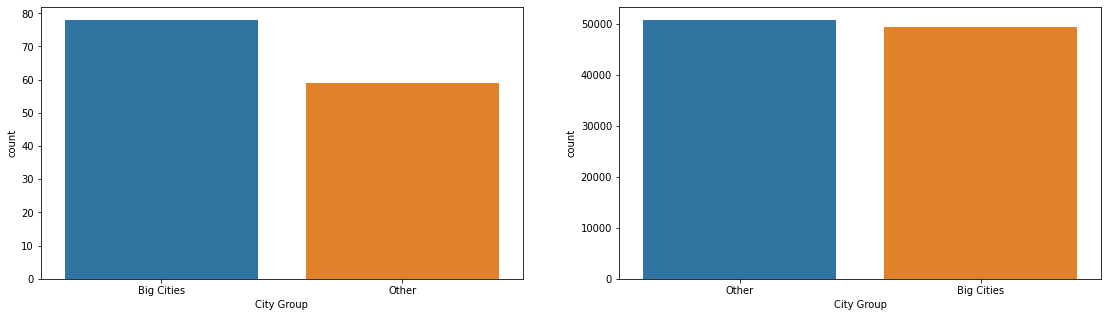

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
ax1 = sns.countplot(x=df['City Group'], ax=ax[0]);
ax2 = sns.countplot(x=test_df['City Group'], ax=ax[1]);

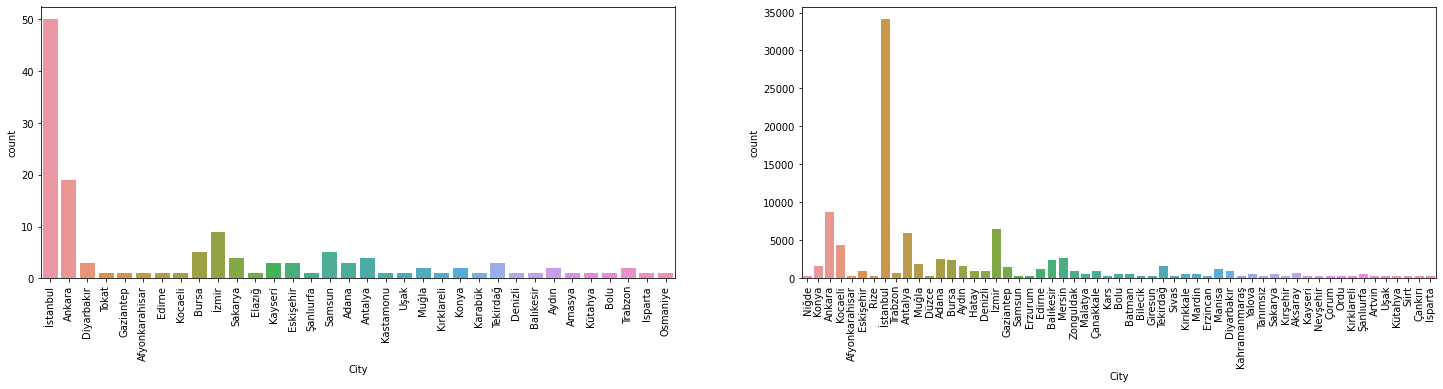

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(25, 5))
ax1 = sns.countplot(x=df['City'], ax=ax[0])
plt.setp(ax1.get_xticklabels(), rotation=90)
ax2 = sns.countplot(x=test_df['City'], ax=ax[1])
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.show()

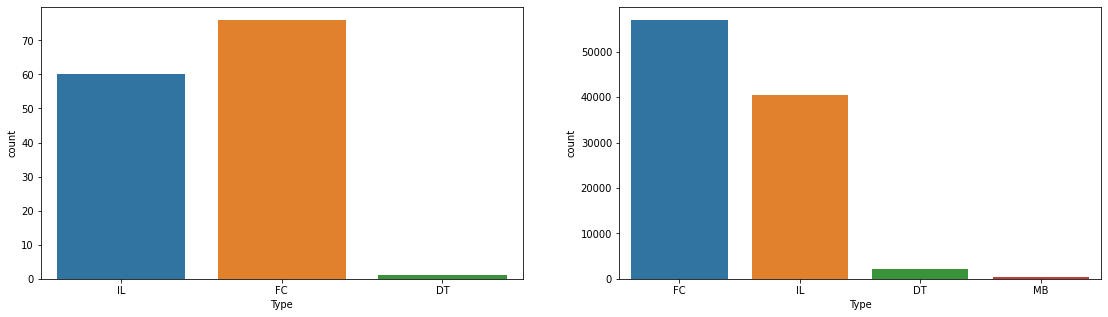

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
ax1 = sns.countplot(x=df['Type'], ax=ax[0]);
ax2 = sns.countplot(x=test_df['Type'], ax=ax[1]);

we can see from above graphs, the test set contains more unique data points than in test set. for ex, in 'City' feature test set contains more cities than in train set. so, we can just remove it. And, the 'Type' feature in test set has some records of 'MB' type which can be changed to 'FC' as it frequency is higher

In [ ]:
test_df.loc[test_df['Type']=='MB', 'Type'] = 'FC'

In [ ]:
df.drop('City', axis=1, inplace=True)
test_df.drop('City', axis=1, inplace=True)

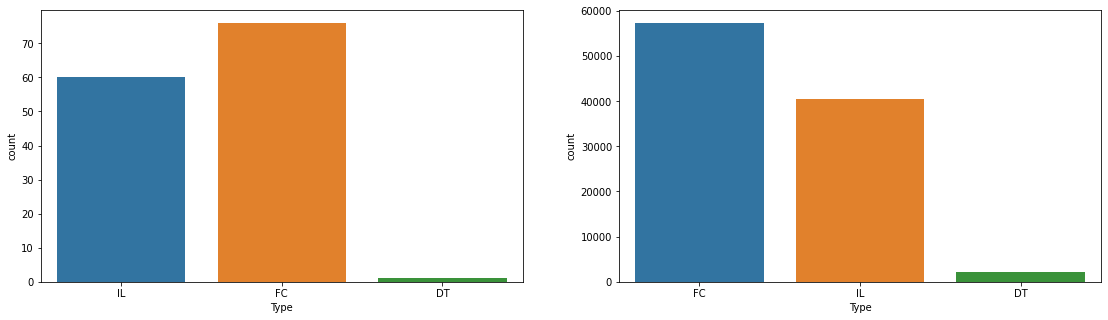

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(x=df['Type'], ax=ax[0]);
g2 = sns.countplot(x=test_df['Type'], ax=ax[1]);

In [ ]:
# drop Id column
df.drop('Id',axis=1,inplace=True)

In [ ]:
import datetime

df['Open Date']  = pd.to_datetime(df['Open Date'])
test_df['Open Date']  = pd.to_datetime(test_df['Open Date'])

In [ ]:
#competition launch date
launch_date = datetime.datetime(2015, 3, 23)
# Number of days open
df['Days Open'] = (launch_date - df['Open Date']).dt.days / 1000
test_df['Days Open'] = (launch_date - test_df['Open Date']).dt.days / 1000

In [ ]:
df.drop('Open Date', axis=1, inplace=True)
test_df.drop('Open Date', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


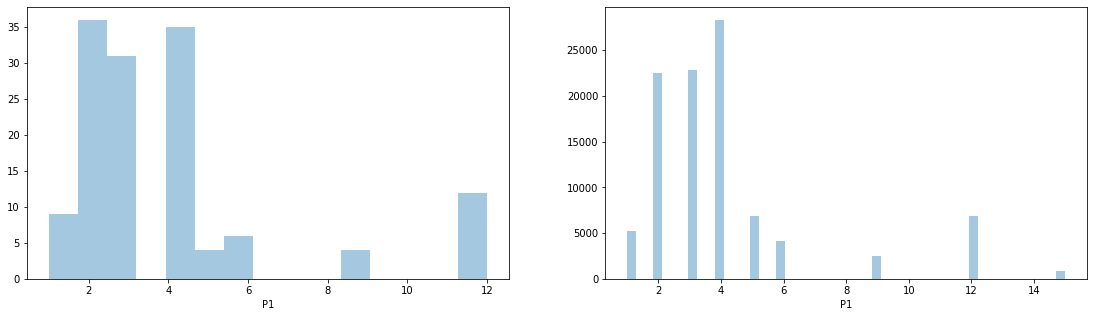

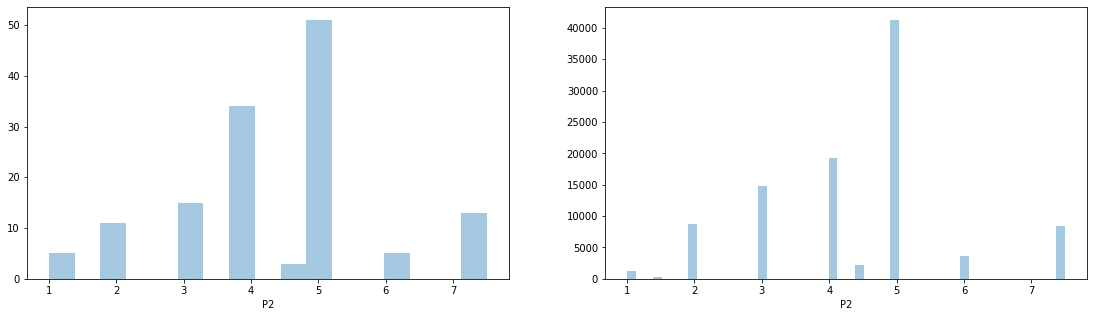

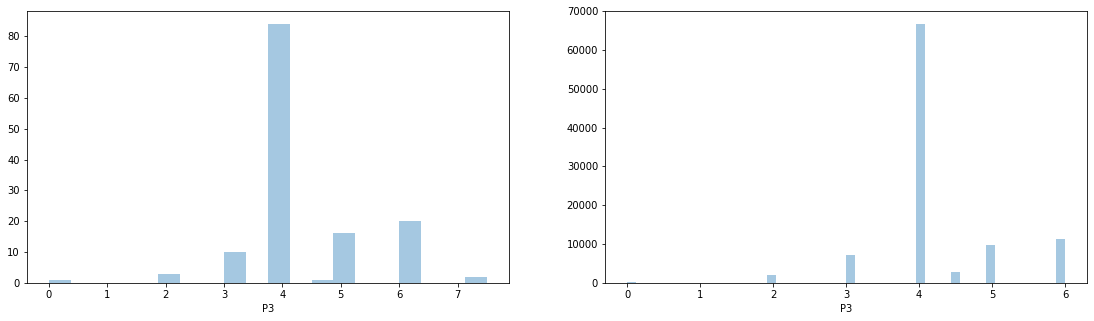

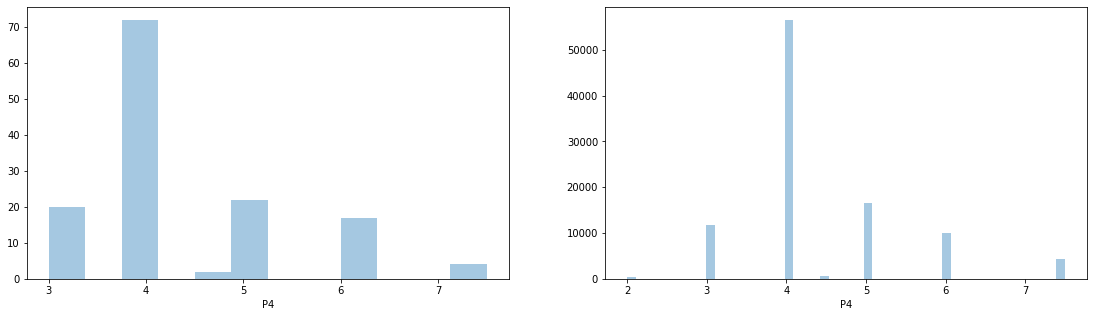

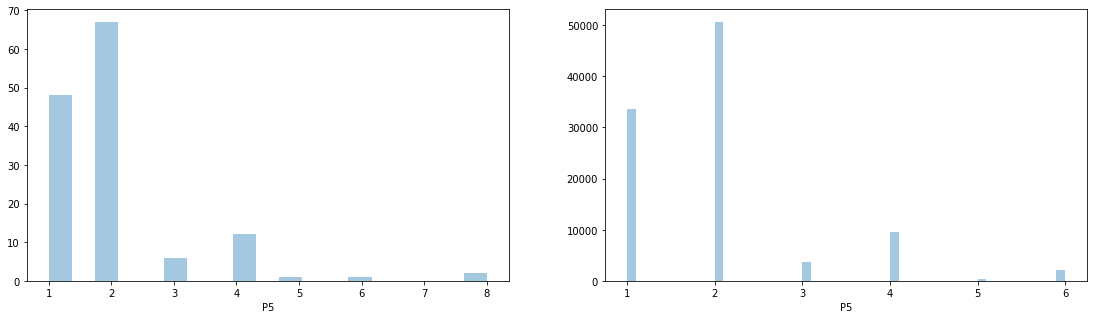

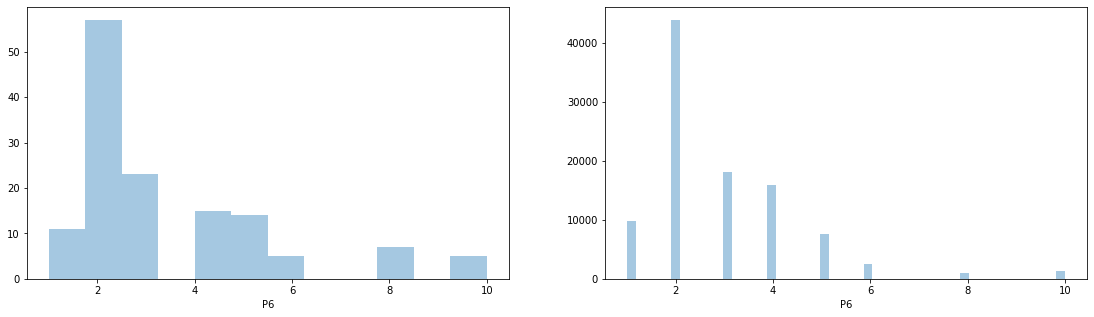

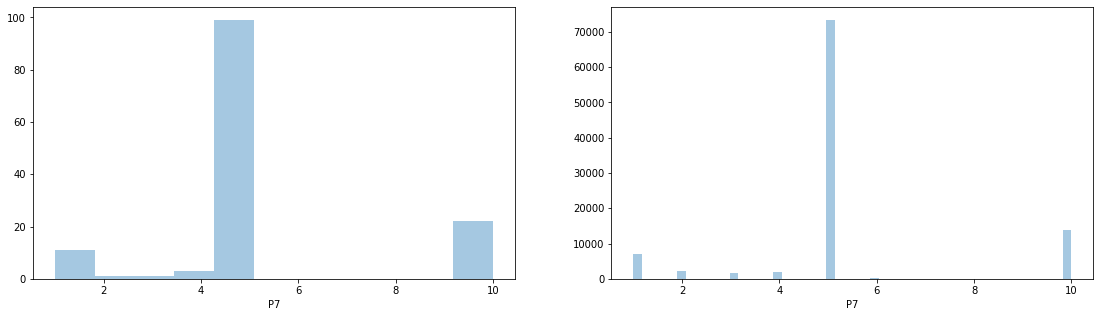

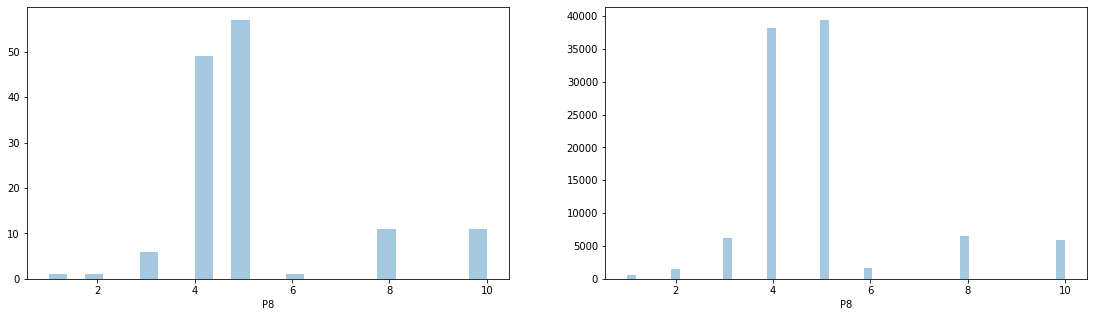

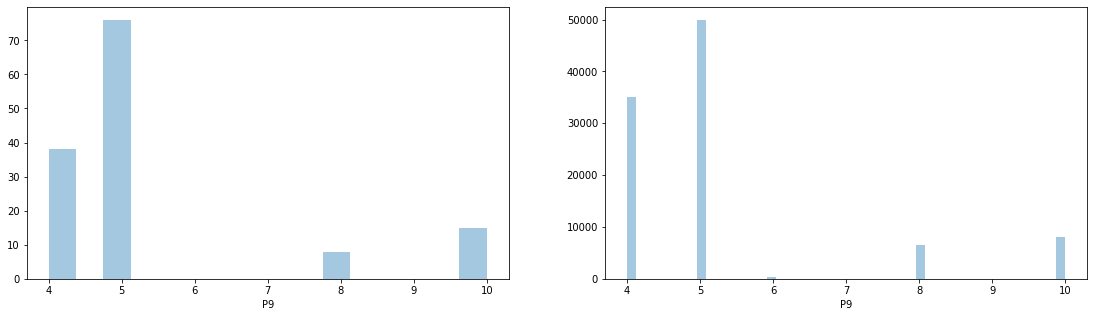

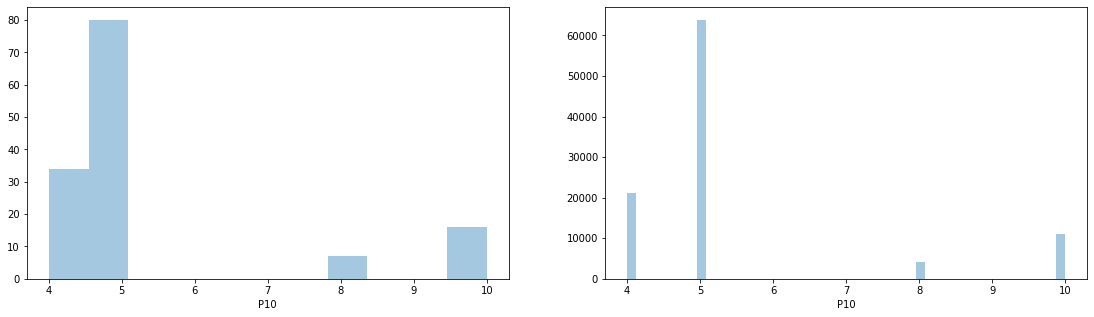

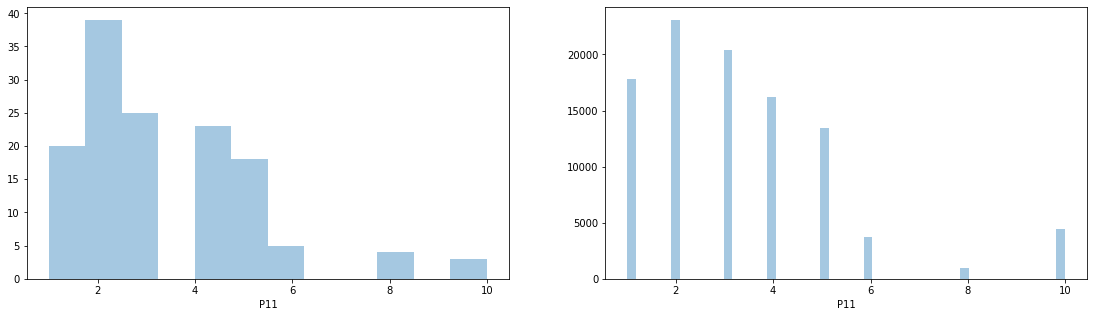

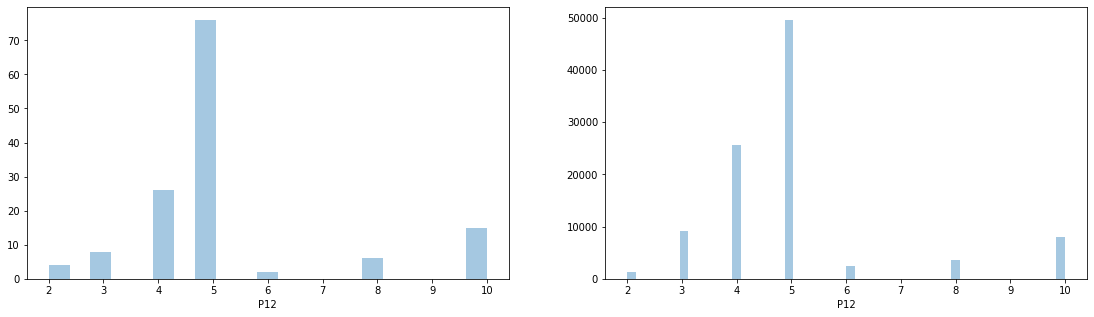

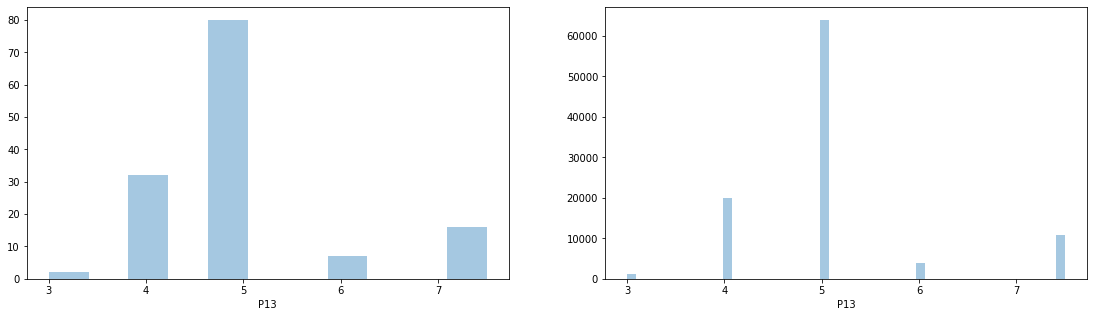

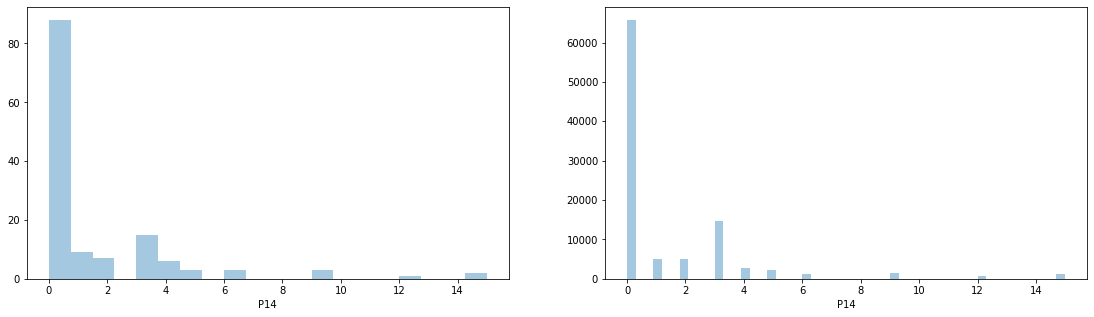

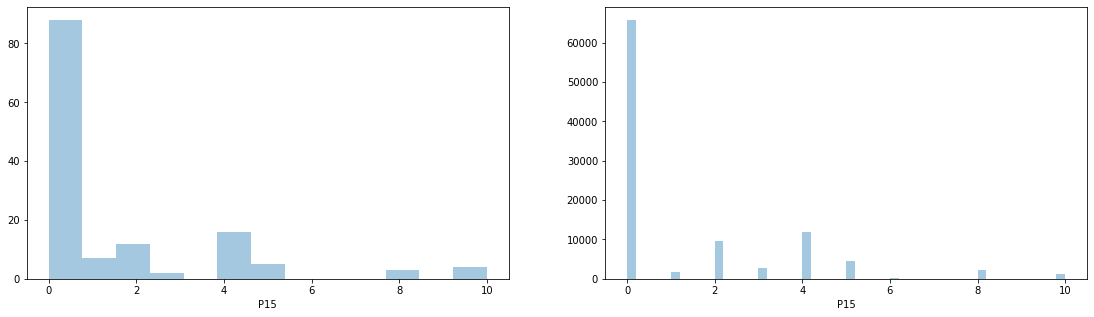

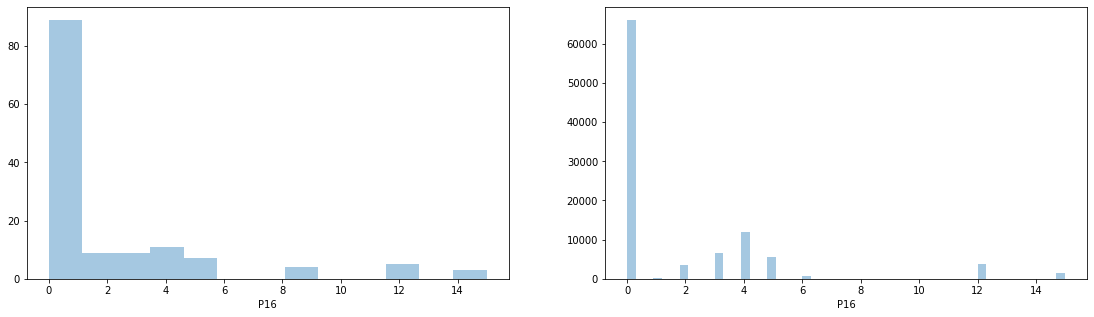

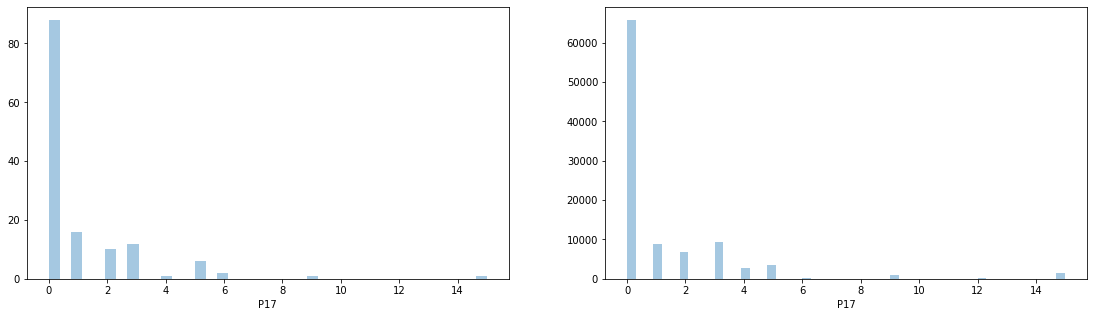

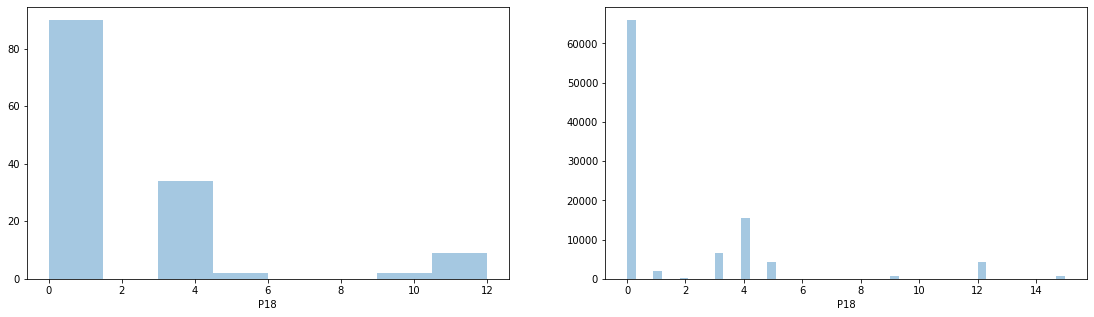

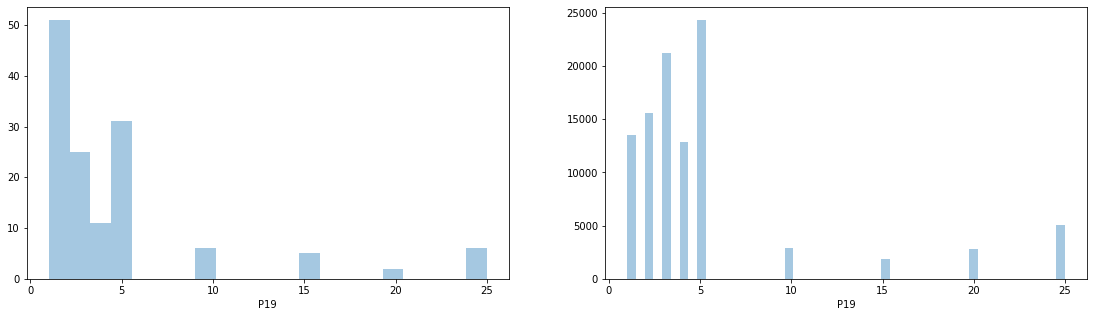

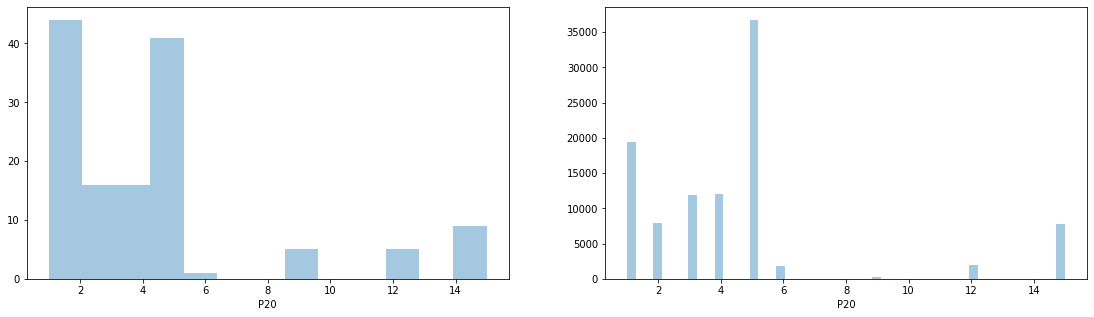

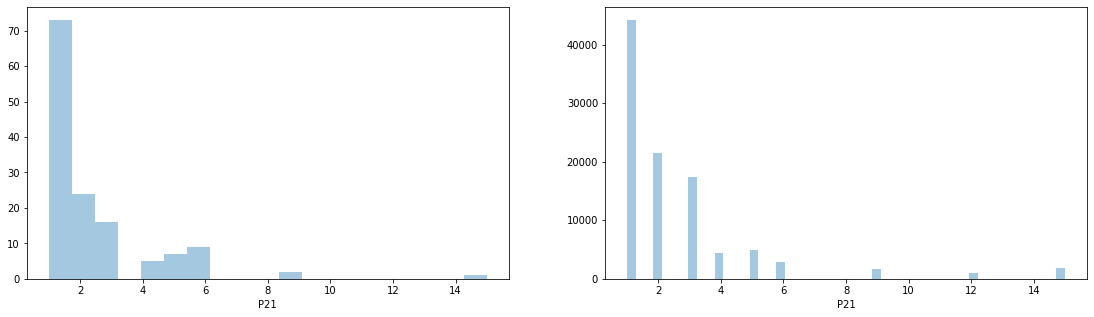

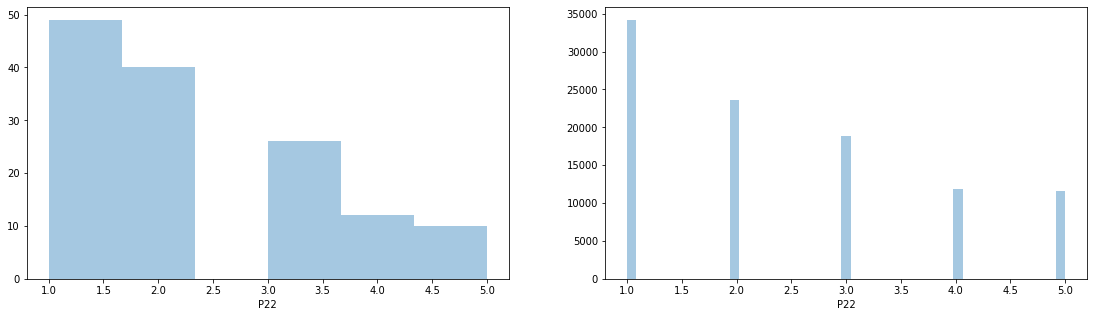

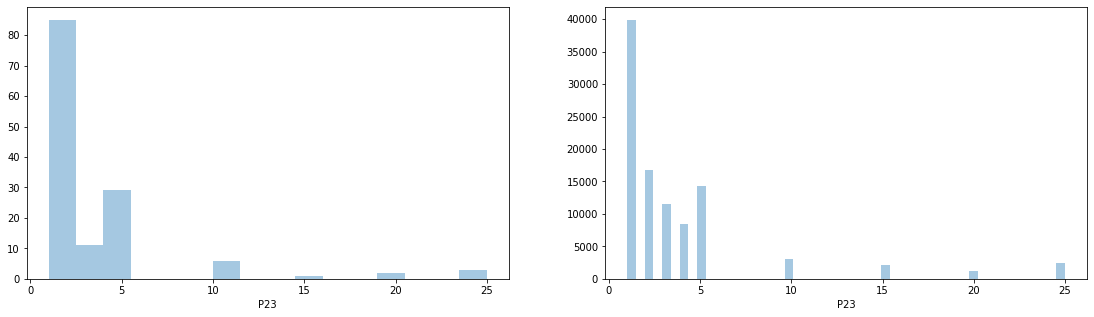

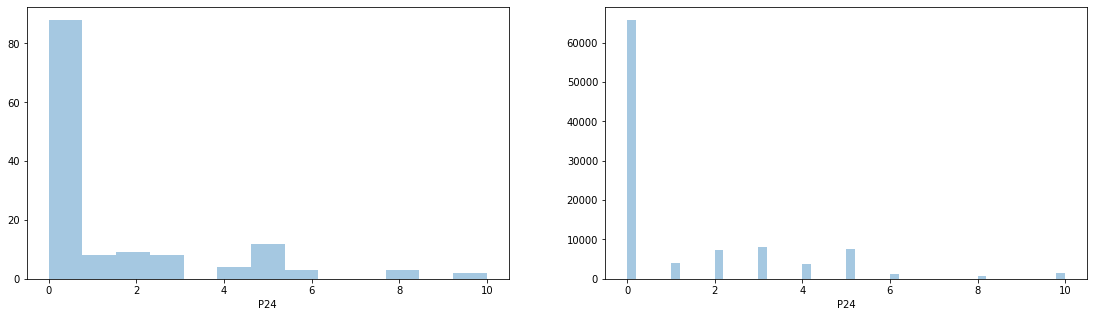

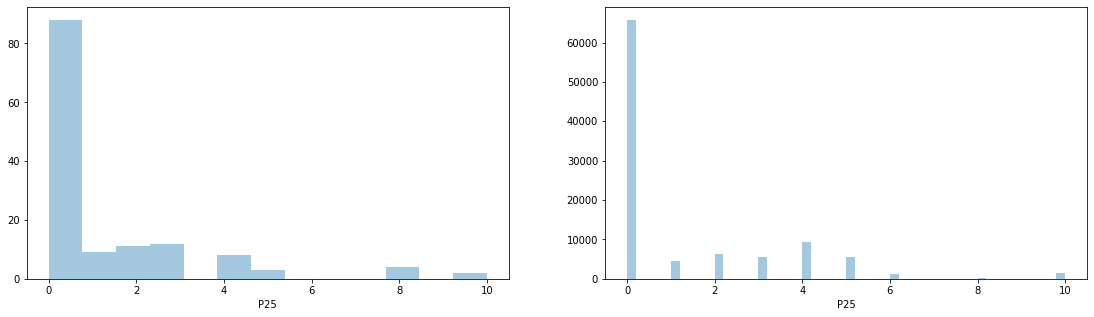

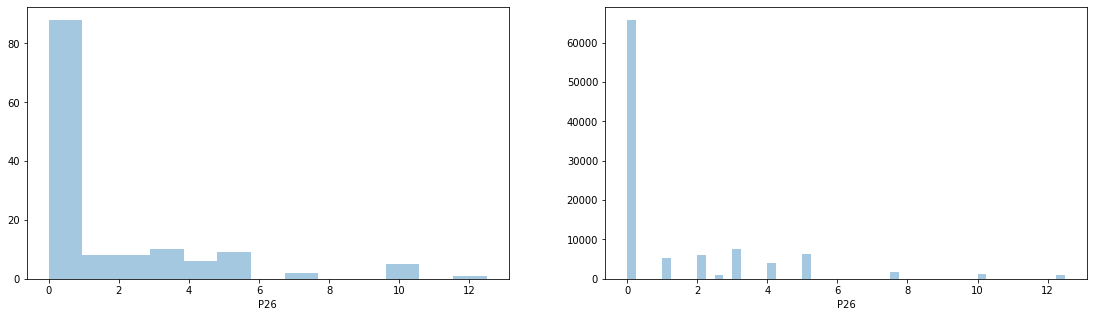

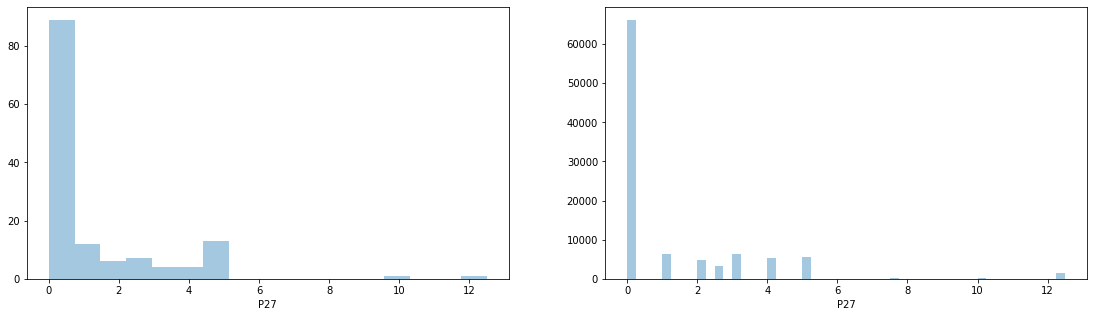

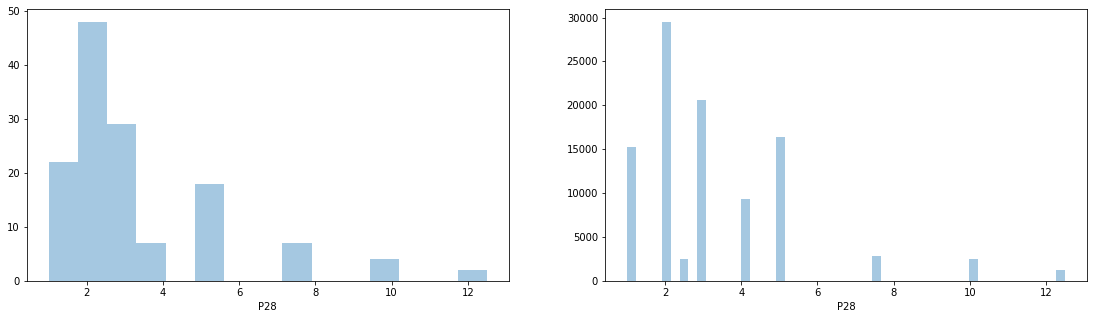

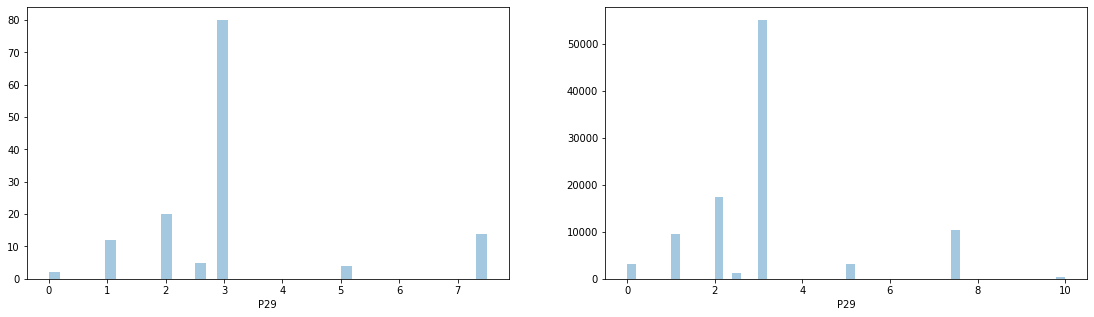

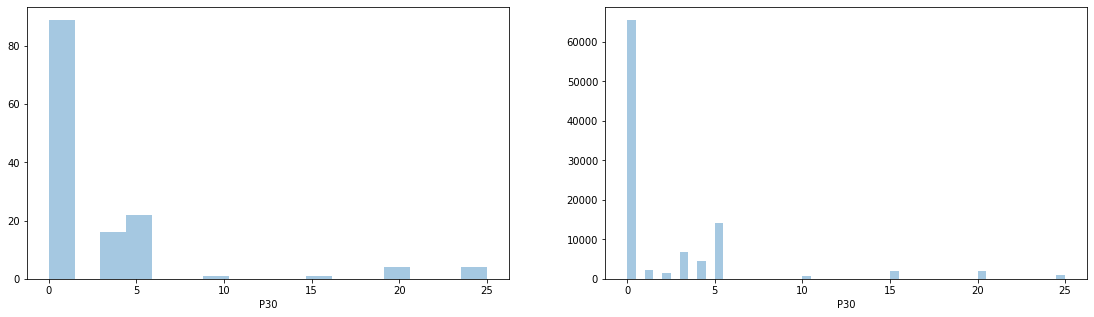

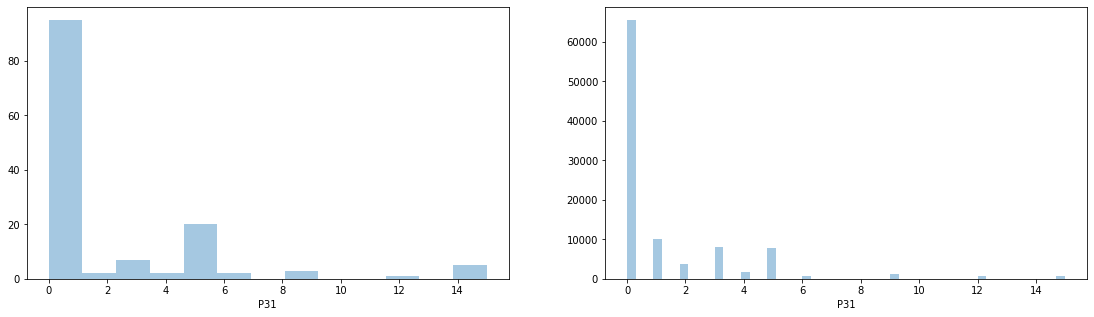

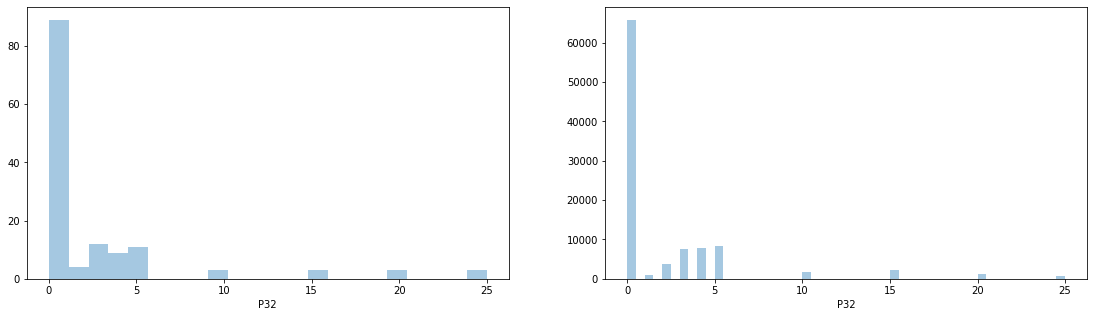

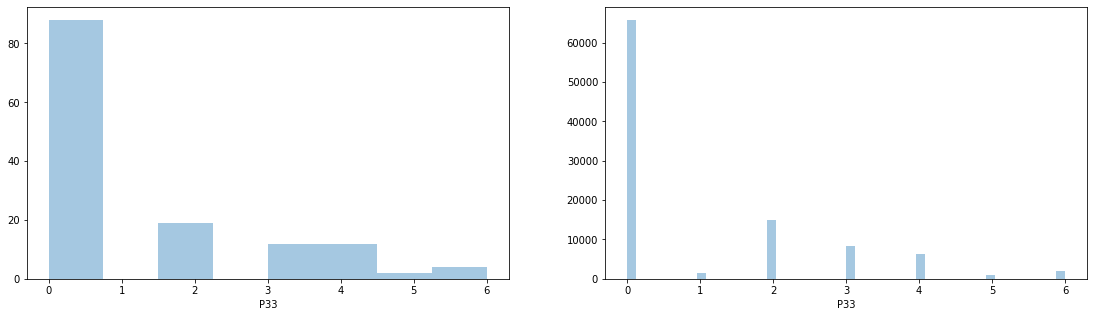

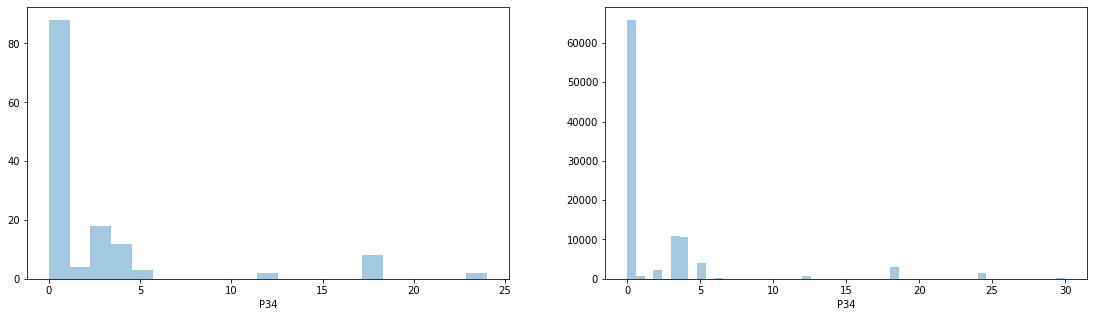

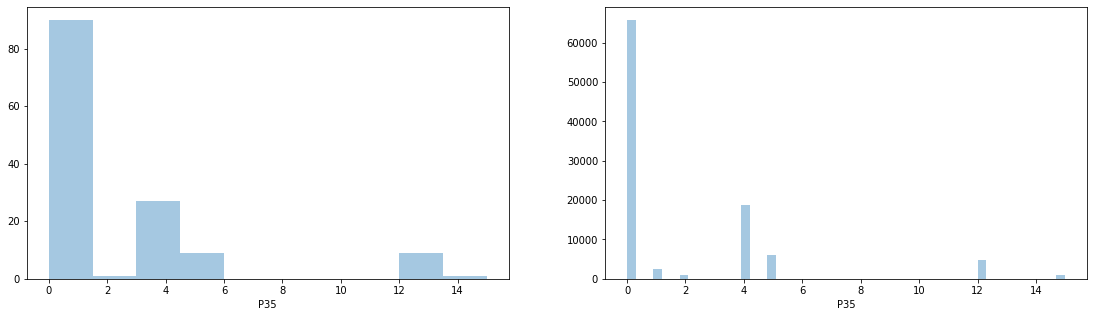

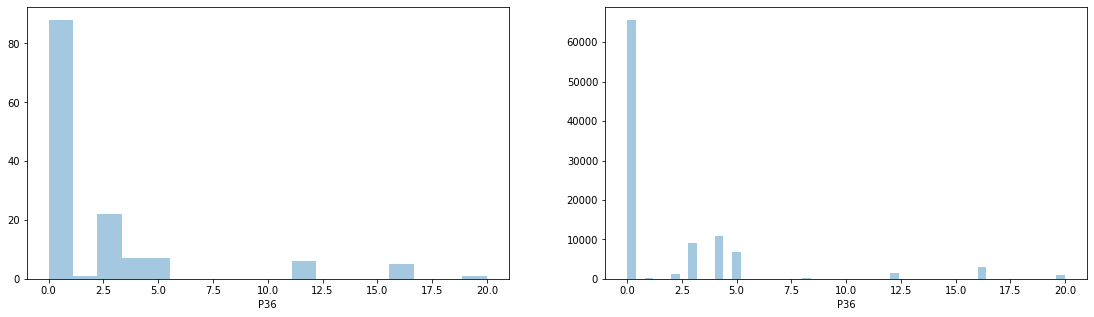

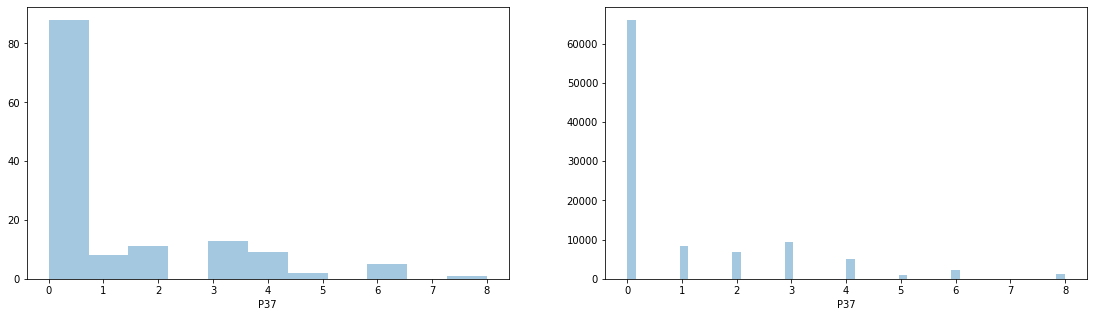

In [ ]:
# characteristics of the features
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    ax1 = sns.distplot(df['P{}'.format(i)], ax=ax[0], kde=False)
    ax2 = sns.distplot(test_df['P{}'.format(i)], ax=ax[1], kde=False)

we can see that, most of the features are categorical.

In [ ]:
df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days Open
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,5.728
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2.594
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0.744
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,1.145
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2.144


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Revenue Distribution')

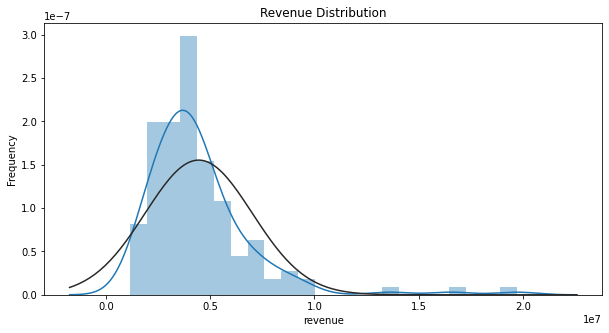

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.distplot(df['revenue'] , fit=norm)
fig.set_ylabel('Frequency')
fig.set_title('Revenue Distribution')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Revenue Distribution')

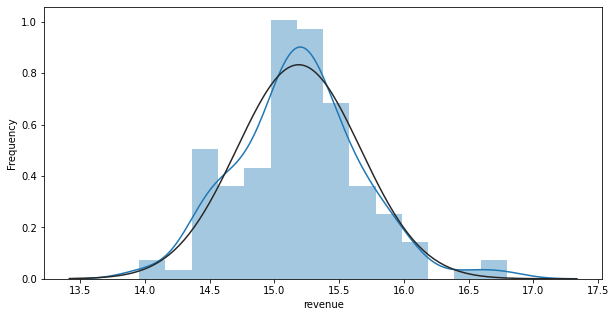

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.distplot(np.log1p(df['revenue']) , fit=norm)
fig.set_ylabel('Frequency')
ax1.set_title('Log Revenue Distribution')

In [ ]:
df.revenue.describe()

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

In [ ]:
#cap the revenue
df.loc[df['revenue'] > 10000000, 'revenue'] = 10000000
          

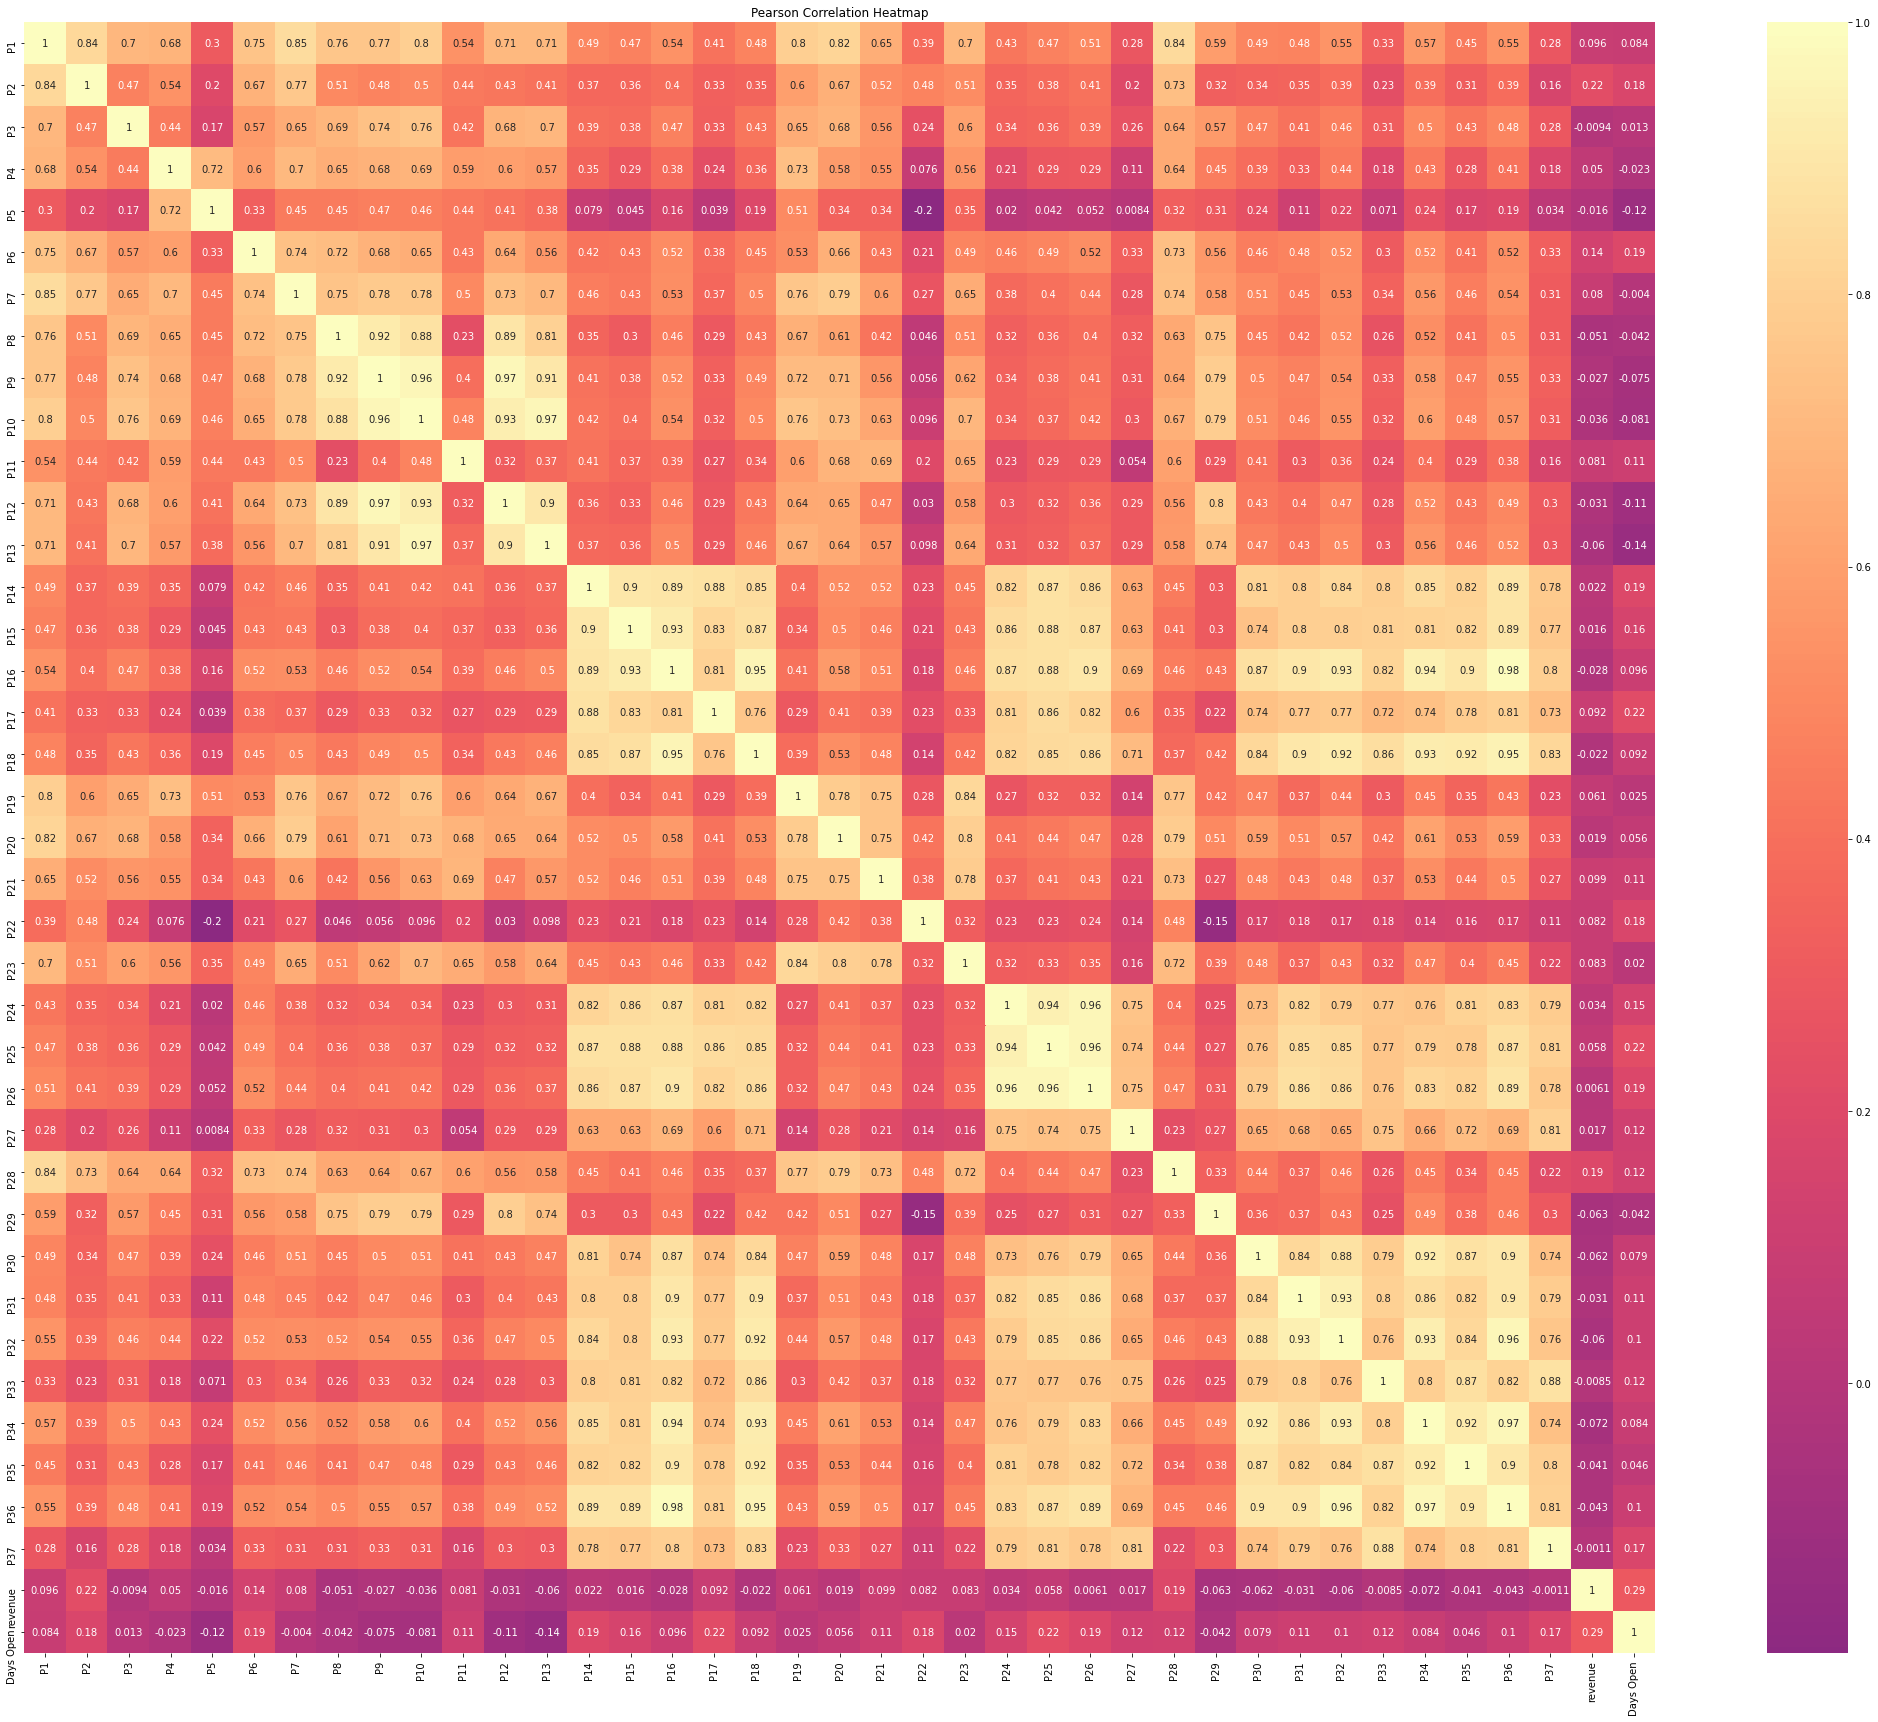

In [ ]:
# Correlation between numeric features with revenue
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),cmap='magma',annot=True,square=True,center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

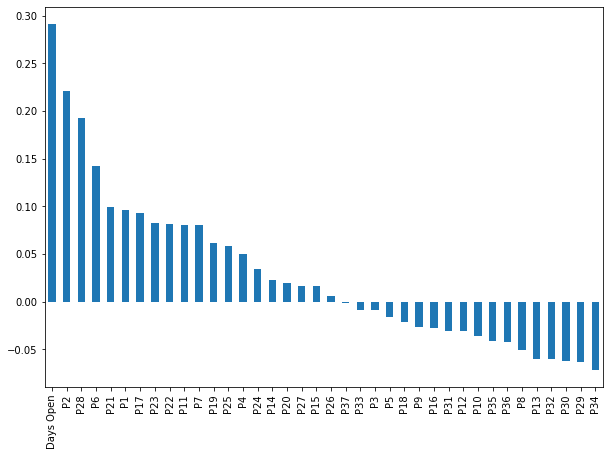

In [ ]:
corr= df.corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
corr.drop('revenue').plot.bar()
plt.show();

# Feature Engineering

If the distribution of the data is left skewed, the skewness values will be negative. If the distribution of the data is right skewed, the skewness values will be positive.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_train = IterativeImputer(max_iter=20, missing_values=0, sample_posterior=True, min_value=1, random_state=43)
imp_test = IterativeImputer(max_iter=20, missing_values=0, sample_posterior=True, min_value=1, random_state=43)

columns = ['P'+str(i) for i in range(1,38)]
df[columns] = np.round(imp_train.fit_transform(df[columns]))
test_df[columns] = np.round(imp_test.fit_transform(test_df[columns]))

In [ ]:
df.select_dtypes(include=[object]).columns

Index(['City Group', 'Type'], dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['City Group', 'Type'], drop_first=False)
test_df = pd.get_dummies(test_df, columns=['City Group', 'Type'], drop_first=False)

In [ ]:
X, y = df.drop('revenue', axis=1), np.log1p(df['revenue'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((109, 43), (28, 43), (109,), (28,))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.20, random_state=43)

# Ridge and Lasso Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_train, y_train)

print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 5.00
Optimal fit_intercept: True
Optimal normalize: True
Optimal solver: saga
Best score: -0.4386371559588401


In [ ]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -34.55360536543457
Test r2 score:  0.026488965718883817
Train RMSE: 0.4239
Test RMSE: 0.4471


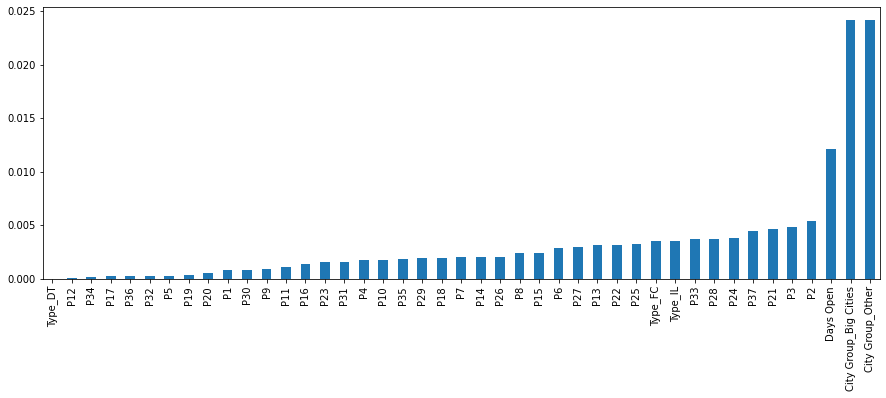

In [ ]:
ridge_feature_coef = pd.Series(index = X_train.columns, data = np.abs(ridge_model.coef_))
ridge_feature_coef.sort_values().plot(kind = 'bar', figsize = (15,5));

In [ ]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {lasso_regressor.best_params_["normalize"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Optimal normalize: True
Best score: -0.4413170727243603


In [ ]:
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"], 
                    normalize=lasso_regressor.best_params_["normalize"])
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)
print('Train r2 score: ', r2_score(y_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -337.32444877084095
Test r2 score:  -0.012147499925200478
Train RMSE: 0.4417
Test RMSE: 0.4558


1 features with reduction of 97.67%


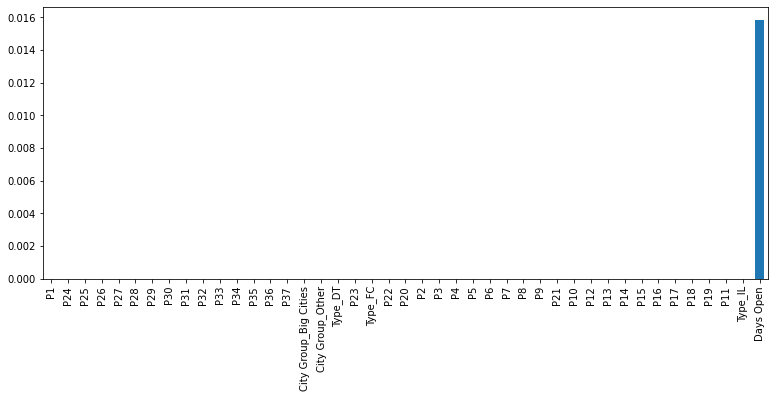

In [ ]:
# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = X_train.columns, data = np.abs(lasso_model.coef_))
n_features = (lasso_feature_coef>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(lasso_feature_coef))*100:2.2f}%')
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

# Ridge and Lasso Regression after PCA 

In [ ]:
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_train_pca, y_train_pca)

print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 1.00
Optimal fit_intercept: True
Optimal normalize: True
Optimal solver: saga
Best score: -0.43969202087957315


In [ ]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(X_train_pca, y_train_pca)
y_train_pred = ridge_model.predict(X_train_pca)
y_pred = ridge_model.predict(X_test_pca)
print('Train r2 score: ', r2_score(y_train_pred, y_train_pca))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_pca))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -15.699337849775517
Test r2 score:  0.01991850037642673
Train RMSE: 0.4127
Test RMSE: 0.4486


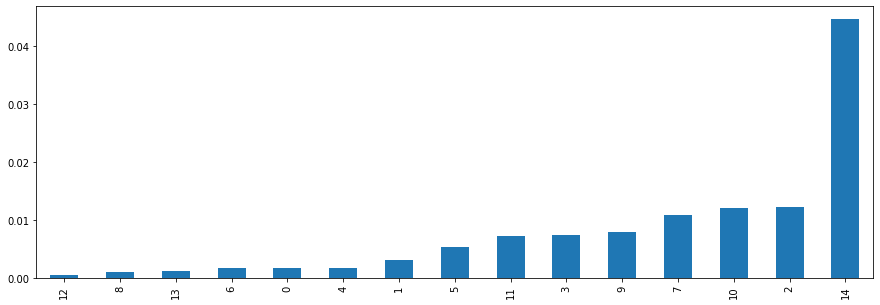

In [ ]:
ridge_feature_coef = pd.Series(index = X_train_pca.columns, data = np.abs(ridge_model.coef_))
ridge_feature_coef.sort_values().plot(kind = 'bar', figsize = (15,5));

# ElasticNet (combination of Ridge & Lasso)

In [ ]:
from sklearn.linear_model import ElasticNetCV

el_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=5e-2, cv=10, n_jobs=-1)         
el_model.fit(X_train, y_train)
print(f'Optimal alpha: {el_model.alpha_:.6f}')
print(f'Optimal l1_ratio: {el_model.l1_ratio_:.3f}')
print(f'Number of iterations {el_model.n_iter_}')

Optimal alpha: 0.264113
Optimal l1_ratio: 1.000
Number of iterations 3


In [ ]:
y_pred = el_model.predict(X_train)
y_test_pred = el_model.predict(X_test)
print('Train r2 score: ', r2_score(y_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -647.5658462444636
Test r2 score:  -0.046321715714902956
Train RMSE: 0.4454
Test RMSE: 0.4635


1 features with reduction of 97.67%


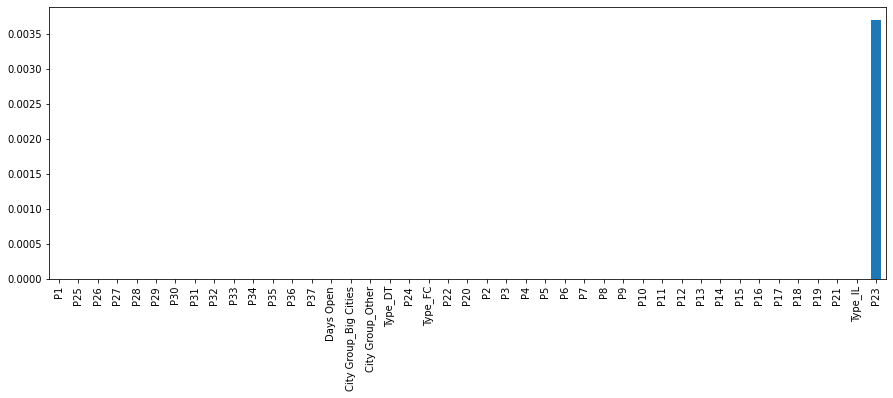

In [ ]:
elastic_feature_coef = pd.Series(index = X_train.columns, data = np.abs(el_model.coef_))
n_features = (elastic_feature_coef>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(elastic_feature_coef))*100:2.2f}%')
elastic_feature_coef.sort_values().plot(kind = 'bar', figsize = (15,5));

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11, 15],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 11
Best score: -0.4334768728798076


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -8.063159379155932
Test r2 score:  -0.15589719537045288
Train RMSE: 0.4013
Test RMSE: 0.4871


# K-Nearest Neighbors after PCA

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11, 15],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train_pca, y_train_pca)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 15
Best score: -0.43512361787460707


In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(X_train_pca, y_train_pca)
y_train_pred = knn_model.predict(X_train_pca)
y_pred = knn_model.predict(X_test_pca)
print('Train r2 score: ', r2_score(y_train_pred, y_train_pca))
print('Test r2 score: ', r2_score(y_test_pca, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_pca))
test_rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -11.995643365820623
Test r2 score:  -0.03257571562917416
Train RMSE: 0.4198
Test RMSE: 0.4604


# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

params_svr = [{'kernel': [ 'rbf', 'poly', 'sigmoid'], 
               'gamma': ['auto'],
               'C': [1, 10, 100, 1000, 10000]}]
svr_model = SVR(epsilon = 0.01)
svr = GridSearchCV(svr_model, params_svr,scoring='neg_root_mean_squared_error', cv = 5,n_jobs=-1)
svr.fit(X_train, y_train)
print(f'Optimal kernel: {svr.best_params_["kernel"]}')
print(f'Optimal gamma: {svr.best_params_["gamma"]}')
print(f'Optimal C: {svr.best_params_["C"]}')
print(f'Best score: {svr.best_score_}')

Optimal kernel: rbf
Optimal gamma: auto
Optimal C: 1
Best score: -0.4407418868365312


In [ ]:
svr_model = SVR(kernel=svr.best_params_["kernel"], C = svr.best_params_["C"], gamma = svr.best_params_["gamma"], epsilon = 0.01)
svr_model.fit(X_train, y_train)
y_train_pred = svr_model.predict(X_train)
y_pred = svr_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9850173981177839
Test r2 score:  0.013188727109573972
Train RMSE: 0.0521
Test RMSE: 0.4501


# Support Vector Regressor after PCA

In [ ]:
from sklearn.svm import SVR

params_svr = [{'kernel': [ 'rbf', 'poly', 'sigmoid'], 
               'gamma': ['auto'],
               'C': [1, 10, 100, 1000, 10000]}]
svr_model = SVR(epsilon = 0.01)
svr = GridSearchCV(svr_model, params_svr,scoring='neg_root_mean_squared_error', cv = 5,n_jobs=-1)
svr.fit(X_train_pca, y_train_pca)
print(f'Optimal kernel: {svr.best_params_["kernel"]}')
print(f'Optimal gamma: {svr.best_params_["gamma"]}')
print(f'Optimal C: {svr.best_params_["C"]}')
print(f'Best score: {svr.best_score_}')

Optimal kernel: rbf
Optimal gamma: auto
Optimal C: 1
Best score: -0.4398405769925201


In [ ]:
svr_model = SVR(kernel=svr.best_params_["kernel"], C = svr.best_params_["C"], gamma = svr.best_params_["gamma"], epsilon = 0.01)
svr_model.fit(X_train_pca, y_train_pca)
y_train_pred = svr_model.predict(X_train_pca)
y_pred = svr_model.predict(X_test_pca)
print('Train r2 score: ', r2_score(y_train_pred, y_train_pca))
print('Test r2 score: ', r2_score(y_test_pca, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_pca))
test_rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9949069142462403
Test r2 score:  0.0005216687340701132
Train RMSE: 0.0309
Test RMSE: 0.4530


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [30, 45, 50, 65, 85, 100],
    'max_features': [.3, .5, .6, .8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 30
Optimal max_features: 0.8
Optimal min_sample_leaf: 3
Optimal min_samples_split: 8
Optimal n_estimators: 30
Best score: -0.38953323952892804


In [ ]:
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.33624047557369185
Test r2 score:  0.1625856263241271
Train RMSE: 0.2265
Test RMSE: 0.4146


39 features with reduction of 9.30%


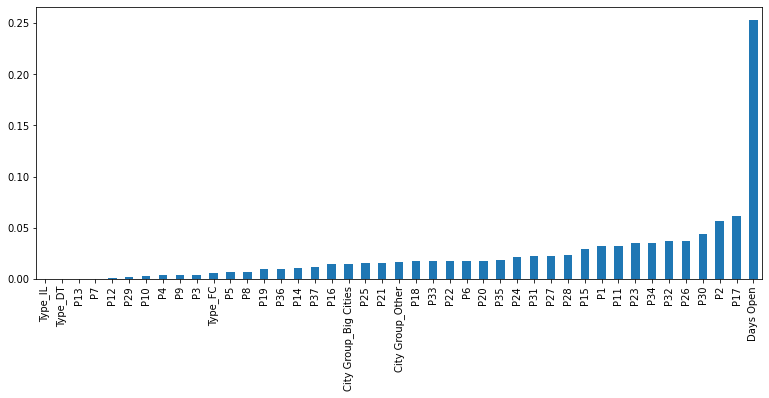

In [ ]:
# Random Forest Model Feature Importance
rf_feature_importance = pd.Series(index = X_train.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

# Random Forest after PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [30, 45, 50, 65, 85, 100],
    'max_features': [.3, .5, .6, .8],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train_pca, y_train_pca)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 50
Optimal max_features: 0.3
Optimal min_sample_leaf: 5
Optimal min_samples_split: 12
Optimal n_estimators: 30
Best score: -0.4210557341428835


In [ ]:
rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train_pca, y_train_pca)
y_train_pred = rf_model.predict(X_train_pca)
y_pred = rf_model.predict(X_test_pca)
print('Train r2 score: ', r2_score(y_train_pred, y_train_pca))
print('Test r2 score: ', r2_score(y_test_pca, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train_pca))
test_rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -2.092299354589042
Test r2 score:  0.07578196778425039
Train RMSE: 0.3114
Test RMSE: 0.4356


15 features with reduction of 0.00%


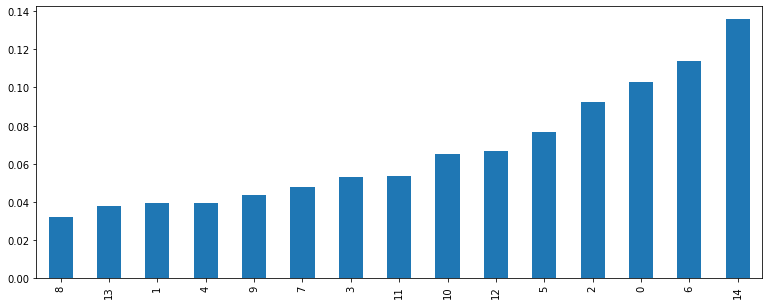

In [ ]:
# Random Forest Model Feature Importance
rf_feature_importance = pd.Series(index = X_train_pca.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

# Light GBM

In [ ]:
import lightgbm as lgbm

params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

Optimal lr: 0.1
Optimal feature_fraction: 1
Optimal n_estimators: 30
Best score: -0.40252653644429703


In [ ]:
lgb_model = lgbm.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], boosting='gbdt', 
                               metric='l1', feature_fraction=lgb_regressor.best_params_["feature_fraction"], 
                               num_leaves=20, min_data=10, max_depth=10, 
                               n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)
lgb_model.fit(X_train, y_train)
y_train_pred = lgb_model.predict(X_train)
y_pred = lgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.6512765543669927
Test r2 score:  0.030301065234846214
Train RMSE: 0.1838
Test RMSE: 0.4462


33 features with reduction of 23.26%


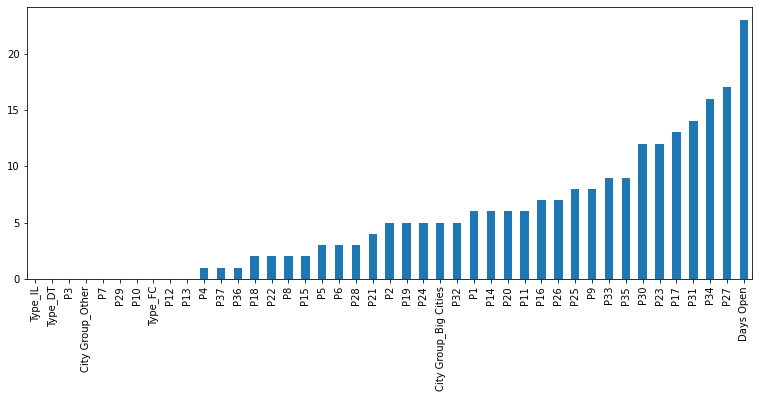

In [ ]:
# LightGBM Feature Importance
lgb_feature_coef = pd.Series(index = X_train.columns, data = np.abs(lgb_model.feature_importances_))
n_features = (lgb_feature_coef>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(lgb_feature_coef))*100:2.2f}%')
lgb_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

# Regressor Ensembling

In [ ]:
rf_model_en = RandomForestRegressor(max_depth=200, max_features=0.4, min_samples_leaf=3, 
                                 min_samples_split=6, n_estimators=30, n_jobs=-1, oob_score=True)
rf_model_en.fit(X_train, y_train)
y_train_pred = rf_model_en.predict(X_train)
y_pred = rf_model_en.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.11794543128619528
Test r2 score:  0.18670695661382708
Train RMSE: 0.2355
Test RMSE: 0.4086


In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt

In [ ]:
# define the base models
base_models = list()
base_models.append(('ridge', ridge_model))
base_models.append(('lasso', lasso_model))
base_models.append(('rf', rf_model_en))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack1 = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
# fit the model on all available data
stack1.fit(X, y)

StackingRegressor(cv=10,
                  estimators=[('ridge',
                               Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                     max_iter=None, normalize=True,
                                     random_state=None, solver='saga',
                                     tol=0.001)),
                              ('lasso',
                               Lasso(alpha=0.01, copy_X=True,
                                     fit_intercept=True, max_iter=1000,
                                     normalize=True, positive=False,
                                     precompute=False, random_state=None,
                                     selection='cyclic', tol=0.0001,
                                     warm_start=False)),
                              ('...
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                     

In [ ]:
y_train_pred = stack1.predict(X_train)
y_pred = stack1.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.6447068836767899
Test r2 score:  0.8227601115038112
Train RMSE: 0.1897
Test RMSE: 0.1908


# Clustering

## KMeans Clustering

In [ ]:
#clustering k mean 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
y_km = kmeans.fit_predict(X)
print(y_km)
km_labels = kmeans.labels_.reshape([-1,1])

[4 1 1 0 4 3 4 1 4 0 2 4 1 4 4 3 4 1 4 4 4 4 3 1 4 4 4 1 4 4 1 4 1 4 4 4 4
 4 1 4 4 4 2 1 4 3 4 4 1 3 4 4 1 1 1 1 1 4 4 1 3 0 4 4 3 1 4 4 4 1 1 3 4 1
 2 4 4 1 0 4 1 1 1 4 4 1 1 1 4 4 0 4 2 4 4 1 1 1 1 4 1 4 4 4 4 1 3 4 1 1 0
 1 4 1 4 3 1 4 0 1 1 1 2 1 1 2 4 1 4 1 1 1 1 1 1 1 1]


In [ ]:
km_models = []
inertia=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)
    km_models.append(kmeanModel)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

0.16076654467100318

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in km_models[1:]]

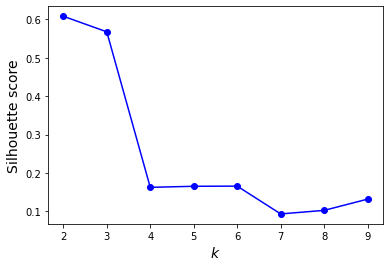

In [ ]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

As we can observe from the graph, it confirms that $k=2$ is a very good choice, but it also underlines the fact that $k=3$ is quite good as well.

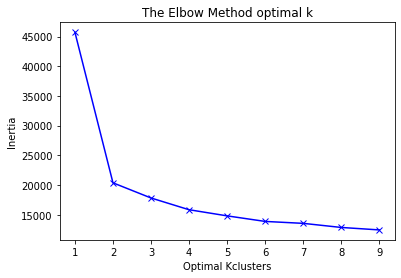

In [ ]:
# plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Optimal Kclusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method optimal k')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=2)
y_km3 = kmeans3.fit_predict(X)
print(y_km3)

[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
silhouette_score(X, kmeans3.labels_)

0.607803151193711

## Hierarchical Clustering  Agglomerative

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cll= AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#predictinglabels
labels = cll.fit_predict(X)

In [ ]:
silhouette_score(X, labels)

0.5673003359431749

In [ ]:
label_list = []
K = range(1,10)
for k in K:
    cll= AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
    labels = cll.fit_predict(X)
    label_list.append(labels)

In [ ]:
silhouette_scores = [silhouette_score(X, label)
                     for label in label_list[1:]]

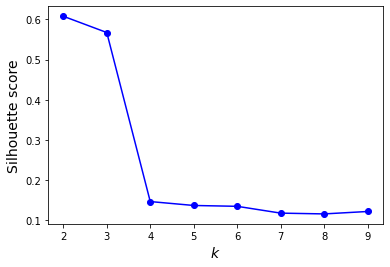

In [ ]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
cll= AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels = cll.fit_predict(X)

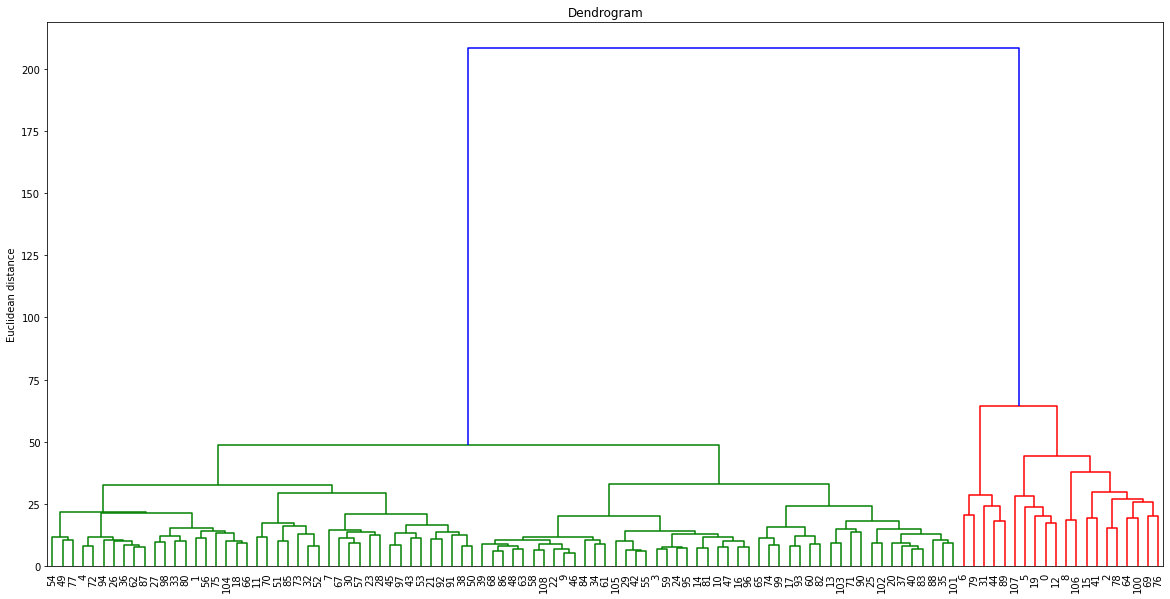

In [ ]:
from scipy.cluster.hierarchy import dendrogram , linkage
plt.figure(figsize=(20,10))
Z = linkage(X_train, method = 'ward')
dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.tick_params(labelsize=10)
plt.show()

## Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3,assign_labels='discretize',affinity='nearest_neighbors',random_state=430)
labels = model.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

0.16493231322242305

In [ ]:
label_list = []
K = range(1,10)
for k in K:
    model= SpectralClustering(n_clusters = k, assign_labels='discretize',affinity='nearest_neighbors',random_state=430)
    labels = model.fit_predict(X)
    label_list.append(labels)

In [ ]:
silhouette_scores = [silhouette_score(X, label)
                     for label in label_list[1:]]

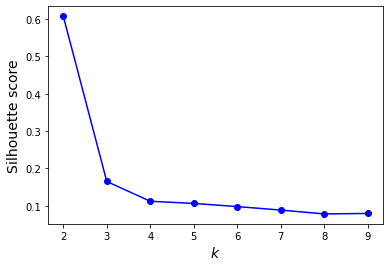

In [ ]:
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,assign_labels='discretize',affinity='nearest_neighbors',random_state=430)
labels = model.fit_predict(X)

## Cluster validation

In [ ]:
from sklearn.metrics import silhouette_score
# Prepare models
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
ag_cll= AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
ag_labels = ag_cll.fit_predict(X)

sc_cll = SpectralClustering(n_clusters=2,assign_labels='discretize',affinity='nearest_neighbors',random_state=430)
sc_labels = sc_cll.fit_predict(X)

# Print results
print('kmeans: {}'.format(silhouette_score(X, kmeans.labels_)))
print('Hierarchial clustering:{}'.format(silhouette_score(X,ag_labels)))
print('Spectral clustering: {}'.format(silhouette_score(X, sc_labels)))

kmeans: 0.607803151193711
Hierarchial clustering:0.607803151193711
Spectral clustering: 0.607803151193711


## Support Vector Regression with KMeans

In [92]:
from sklearn.svm import SVR

X['km_clusters'] = km_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

params_svr = [{'kernel': [ 'rbf'], 
               'gamma': ['auto'],
               'C': [1, 10, 100, 1000, 10000]}]
svr_model = SVR(epsilon = 0.01)
svr = GridSearchCV(svr_model, params_svr,scoring='neg_root_mean_squared_error', cv = 5,n_jobs=-1)
svr.fit(X_train, y_train)
print(f'Optimal kernel: {svr.best_params_["kernel"]}')
print(f'Optimal gamma: {svr.best_params_["gamma"]}')
print(f'Optimal C: {svr.best_params_["C"]}')
print(f'Best score: {svr.best_score_}')

Optimal kernel: rbf
Optimal gamma: auto
Optimal C: 1
Best score: -0.4413903850383198


In [93]:
svr_model = SVR(kernel=svr.best_params_["kernel"], C = svr.best_params_["C"], gamma = svr.best_params_["gamma"], epsilon = 0.01)
svr_model.fit(X_train, y_train)
y_train_pred = svr_model.predict(X_train)
y_pred = svr_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  0.9841301224111991
Test r2 score:  0.013843205433888173
Train RMSE: 0.0536
Test RMSE: 0.4500


# Results
|  Model | Score (before tuning) | Train R2| Test R2 | Train RMSE | Test RMSE|
| --- | -: | -: | -: | -: | -: |
| **Ridge Regression** | -0.4386 | -34.5536 | 0.0264 | 0.4239 | 0.4471 |
| *Ridge Regression(PCA)* | -0.4396 | -15.699 | 0.0199 | 0.4127 | 0.4486 |
| **Lasso Regression** | -0.4413 | -337.3244 | -0.0121 | 0.4417 | 0.4558 |
| **ElasticNet** | - | -647.4658 | -0.0463 | 0.4454 | 0.4635 |
| **Support Vector Regression** | -0.4407 | 0.9850 | 0.0131 | 0.0521 | 0.4501 |
| *Support Vector Regression(PCA)* | -0.4398 | 0.9949 | 0.0005 | 0.0309 | 0.4530 |
| *Support Vector Regression(KMeans)* | -0.4413 | 0.9841 | 0.0138 | 0.0536 | 0.4500 |
| **K-Nearest Neighbour** | -0.4334 | -8.0631 | -0.1558 | 0.4013 | 0.4871 |
| *K-Nearest Neighbour(PCA)* | -0.4351 | -11.9956 | -0.0325 | 0.4198 | 0.4604 |
| **Random Forest** | -0.3895 | 0.3362 | 0.1625 | 0.2265 | 0.4146 |
| *Random Forest(PCA)* | -0.4210 | -2.0922 | 0.0757 | 0.3114 | 0.4356 |
| **Light GBM** | -0.4025 | 0.6512 | 0.0303 | 0.1838 | 0.4462 |
| **Ensembling Stack** | - | 0.6447 | 0.8227 | 0.1897 | 0.1908 |

| Clustering Model | silhouette Score |
| --- | --- |
| KMeans |  0.6078 |
| Agglomerative |  0.6078 |
| Spectral |  0.6078 |

# semi supervised learning

In [101]:
import warnings

warnings.filterwarnings('ignore')

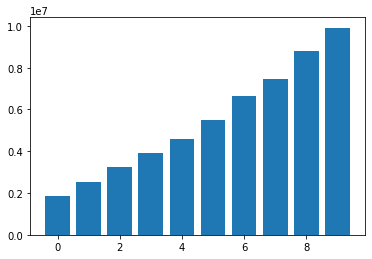

In [102]:
#copy the processed dataframe and perform Semi-Supervised Learning
semi_df = df.copy()
#cluster the revenue in 10bins using KMeans
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10,random_state=43)
model.fit(np.array(semi_df['revenue']).reshape((-1,1)))
semi_df['semi_clusters'] = model.labels_

#visualisation
clust_rev = []
for i in range(10):
  clust_rev.append(semi_df[semi_df['semi_clusters'] == i].revenue.mean())
plt.bar(x = range(10),height=sorted(clust_rev))
plt.show()

In [103]:
ss_X, ss_y = semi_df.drop('revenue', axis=1), np.log1p(semi_df['revenue'])
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(ss_X, ss_y, test_size=0.20, random_state=43)
X_test_ss['semi_clusters'] = -1
ss_X = X_train_ss.append(X_test_ss)
ss_y = ss_X['semi_clusters']
ss_X = ss_X.drop(['semi_clusters'],axis=1)


#fit the model
from sklearn.semi_supervised import LabelPropagation
model = LabelPropagation(kernel='knn',n_jobs=-1)
model.fit(ss_X, ss_y)

LabelPropagation(gamma=20, kernel='knn', max_iter=1000, n_jobs=-1,
                 n_neighbors=7, tol=0.001)

In [104]:
#predict the clusters
X_test_ss['semi_clusters'] = model.predict(X_test_ss.drop(['semi_clusters'],axis=1))
X_test.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Days Open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,km_clusters
126,3.0,3.0,4.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,1.0,5.0,4.0,2.0,4.0,5.0,5.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,5.0,3.0,2.0,2.437,0,1,0,0,1,4
128,2.0,4.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,4.0,2.0,3.0,8.0,3.0,1.0,1.0,1.0,1.0,1.0,6.0,4.0,2.0,3.0,3.0,2.0,8.0,4.0,2.0,3.0,7.0,6.0,3.0,6.0,1.256,1,0,0,1,0,4
38,3.0,5.0,4.0,4.0,2.0,5.0,5.0,4.0,5.0,4.0,3.0,5.0,4.0,4.0,3.0,2.0,5.0,3.0,1.0,4.0,1.0,1.0,1.0,7.0,2.0,7.0,3.0,2.0,2.0,9.0,3.0,6.0,3.0,6.0,8.0,5.0,6.0,1.525,1,0,0,1,0,1
80,4.0,5.0,4.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,3.0,2.0,6.0,3.0,2.0,3.0,5.0,2.0,5.0,3.0,6.0,1.0,4.0,2.0,5.0,1.0,12.0,4.0,8.0,3.0,4.0,5.0,6.0,4.0,1.984,1,0,0,1,0,1
54,2.0,4.0,5.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,5.0,3.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,6.0,3.0,6.0,2.0,3.0,8.0,7.0,7.0,3.0,3.0,2.0,6.0,6.0,5.770,0,1,0,0,1,1


## Ridge model training

train the Ridge model with the semi supervised clusters.

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_train_ss, y_train_ss)

print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 10.00
Optimal fit_intercept: True
Optimal normalize: True
Optimal solver: lsqr
Best score: -0.43958456922999767


In [106]:

ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(X_train_ss, y_train_ss)
y_train_pred_ss = ridge_model.predict(X_train_ss)
y_pred_ss = ridge_model.predict(X_test_ss)
print('Train r2 score: ', r2_score(y_train_pred_ss, y_train_ss))
print('Test r2 score: ', r2_score(y_test_ss, y_pred_ss))
train_rmse = np.sqrt(mean_squared_error(y_train_pred_ss, y_train_ss))
test_rmse = np.sqrt(mean_squared_error(y_test_ss, y_pred_ss))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -72.61074180949184
Test r2 score:  0.0013941965910043708
Train RMSE: 0.4319
Test RMSE: 0.4528


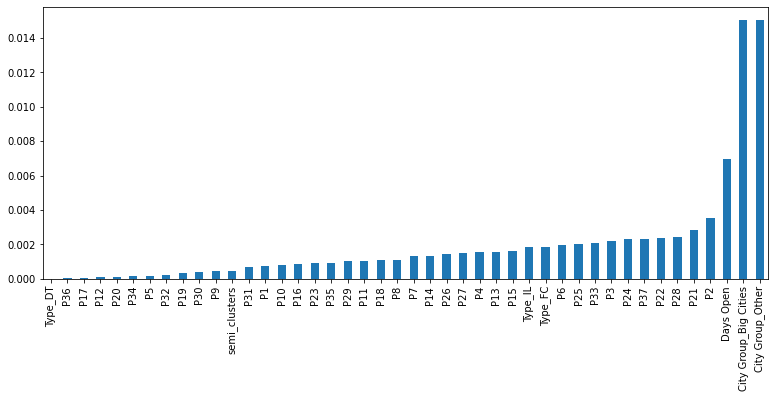

In [107]:
# Ridge Model Feature Importance
ridge_feature_coef = pd.Series(index = X_train_ss.columns, data = np.abs(ridge_model.coef_))
ridge_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));